In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

<b> Correlation between sensors

In [616]:
rbg1_sensor1 = pd.read_csv('datathon_data_official/agg_1min_corrected//RBG1_drive_gear_V_eff.csv')
rbg1_sensor2 = pd.read_csv('datathon_data_official/agg_1min_corrected/RBG1_drive_motor_V_eff.csv')
rbg1_sensor3 = pd.read_csv('datathon_data_official/agg_1min_corrected/RBG1_drive_wheel_V_eff.csv')
rbg1_sensor4 = pd.read_csv('datathon_data_official/agg_1min_corrected/RBG1_idle_wheel_V_eff.csv')
rbg1_sensor5 = pd.read_csv('datathon_data_official/agg_1min_corrected/RBG1_lifting_gear_V_eff.csv')
rbg1_sensor6 = pd.read_csv('datathon_data_official/agg_1min_corrected/RBG1_lifting_motor_V_eff.csv')

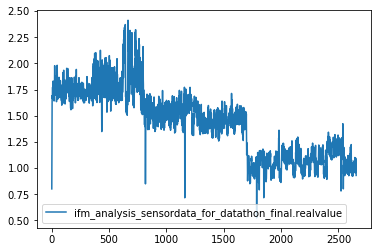

In [617]:
rbg1_sensor1.plot()

In [ ]:
rbg1 = rbg1_sensor1.merge(rbg1_sensor2, on='end_time')\
.merge(rbg1_sensor3, on='end_time')\
.merge(rbg1_sensor4, on='end_time')\
.merge(rbg1_sensor5, on='end_time')\
.merge(rbg1_sensor6, on='end_time')\
.set_index('end_time')

In [ ]:
rbg1.columns = ['drive_gear_V_eff','drive_motor_V_eff','drive_wheel_V_eff','idle_wheel_V_eff','lifting_gear_V_eff','lifting_motor_V_eff']

Correlation among sensors for machine RBG 1 <br>
* differencing by 1 period applied
* Vibration

In [ ]:
rbg1_driver_gear_a_max = pd.read_csv('/Users/kenghooi/Desktop/datathon_data_official/agg_1min_corrected/RBG1_drive_gear_a_max.csv').set_index('end_time')
rbg1_driver_motor_a_max = pd.read_csv('/Users/kenghooi/Desktop/datathon_data_official/agg_1min_corrected/RBG1_drive_motor_a_max.csv').set_index('end_time')
rbg1_drive_wheel_a_max = pd.read_csv('/Users/kenghooi/Desktop/datathon_data_official/agg_1min_corrected/RBG1_drive_wheel_a_max.csv').set_index('end_time')
rbg1_idle_wheel_a_max = pd.read_csv('/Users/kenghooi/Desktop/datathon_data_official/agg_1min_corrected/RBG1_idle_wheel_a_max.csv').set_index('end_time')
rbg1_lifting_gear_a_max = pd.read_csv('/Users/kenghooi/Desktop/datathon_data_official/agg_1min_corrected/RBG1_lifting_gear_a_max.csv').set_index('end_time')
rbg1_lifting_motor_a_max = pd.read_csv('/Users/kenghooi/Desktop/datathon_data_official/agg_1min_corrected/RBG1_lifting_motor_a_max.csv').set_index('end_time')

In [ ]:
rbg1_driver_gear_a_max_no_outlier = rbg1_driver_gear_a_max[abs(rbg1_driver_gear_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'] - rbg1_driver_gear_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].mean()) <= 3*rbg1_driver_gear_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue' ].std() ]
rbg1_driver_motor_a_max_no_outlier = rbg1_driver_motor_a_max[abs(rbg1_driver_motor_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'] - rbg1_driver_motor_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].mean()) <= 3*rbg1_driver_gear_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue' ].std() ]
rbg1_drive_wheel_a_max_no_outlier = rbg1_drive_wheel_a_max[abs(rbg1_drive_wheel_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'] - rbg1_drive_wheel_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].mean()) <= 3*rbg1_drive_wheel_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue' ].std() ]
rbg1_idle_wheel_a_max_no_outlier = rbg1_idle_wheel_a_max[abs(rbg1_idle_wheel_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'] - rbg1_idle_wheel_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].mean()) <= 3*rbg1_idle_wheel_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue' ].std() ]
rbg1_lifting_gear_a_max_no_outlier = rbg1_lifting_gear_a_max[abs(rbg1_lifting_gear_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'] - rbg1_lifting_gear_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].mean()) <= 3*rbg1_lifting_gear_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue' ].std() ]
rbg1_lifting_motor_a_max_no_outlier = rbg1_lifting_motor_a_max[abs(rbg1_lifting_motor_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'] - rbg1_lifting_motor_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].mean()) <= 3*rbg1_lifting_motor_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue' ].std() ]

In [ ]:
rbg1_driver_gear_a_max_no_outlier.to_csv('no_outliers/rbg1_driver_gear_a_max_no_outlier.csv')
rbg1_driver_motor_a_max_no_outlier.to_csv('no_outliers/rbg1_driver_motor_a_max_no_outlier.csv')
rbg1_drive_wheel_a_max_no_outlier.to_csv('no_outliers/rbg1_drive_wheel_a_max_no_outlier.csv')
rbg1_idle_wheel_a_max_no_outlier.to_csv('no_outliers/rbg1_idle_wheel_a_max_no_outlier.csv')
rbg1_lifting_gear_a_max_no_outlier.to_csv('no_outliers/rbg1_lifting_gear_a_max_no_outlier.csv')
rbg1_lifting_motor_a_max_no_outlier.to_csv('no_outliers/rbg1_lifting_motor_a_max_no_outlier.csv')

In [ ]:
mean_ = rbg1_driver_gear_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].mean()
std_ = rbg1_driver_gear_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].std()

print('upper: ',mean_ + 3*std_)
print('lower: ',mean_ - 3*std_)

In [ ]:
def upper_outlier(mean_, std_):
    return mean_ + 3*std_

def lower_outlier(mean_, std_):
    return mean_ - 3*std_

In [ ]:
p99 = rbg1_driver_gear_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].quantile(0.99)
p1 = rbg1_driver_gear_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].quantile(0.01)

In [ ]:
f,ax = plt.subplots(1,3, figsize=(12,5))
rbg1_driver_gear_a_max.plot(ax=ax[0])
ax[0].axhline(mean_ + 3*std_,color='r')
ax[0].axhline(mean_ - 3*std_,color='r')
ax[0].set_ylim(0,2500)
rbg1_driver_gear_a_max.plot(ax=ax[1])
ax[1].axhline(p99,color='r')
ax[1].axhline(p1,color='r')
ax[1].set_ylim(0,2500)
rbg1_driver_gear_a_max_no_outlier.plot(ax=ax[2])
ax[2].set_ylim(0,2500)

In [ ]:
mean_ = rbg1_drive_wheel_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].mean()
std_ = rbg1_drive_wheel_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].std()

In [ ]:
p99 = rbg1_drive_wheel_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].quantile(0.99)
p1 = rbg1_drive_wheel_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].quantile(0.01)

In [ ]:
f,ax = plt.subplots(1,3, figsize=(15,5))
rbg1_drive_wheel_a_max.plot(ax=ax[0])
ax[0].axhline(mean_ + 3*std_,color='r')
ax[0].axhline(mean_ - 3*std_,color='r')
ax[0].set_ylim(0,2100)
rbg1_drive_wheel_a_max.plot(ax=ax[1])
ax[1].axhline(p99,color='r')
ax[1].axhline(p1,color='r')
ax[1].set_ylim(0,2100)
rbg1_drive_wheel_a_max_no_outlier.plot(ax=ax[2])
ax[2].set_ylim(0,2100)

In [ ]:
repair1,repair2 = repair_log['date'][:2].apply(lambda x: dt.datetime.strptime(x,'%d.%m.%Y' )).values

In [ ]:
mean_ = rbg1_idle_wheel_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].mean()
std_ = rbg1_idle_wheel_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].std()
p99 = rbg1_idle_wheel_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].quantile(0.999)
p1 = rbg1_idle_wheel_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].quantile(0.001)

f,ax = plt.subplots(1,3, figsize=(15,5))
rbg1_idle_wheel_a_max.plot(ax=ax[0])
ax[0].axhline(mean_ + 3*std_,color='r')
ax[0].axhline(mean_ - 3*std_,color='r')
ax[0].set_ylim(0,2100)

rbg1_idle_wheel_a_max.index = pd.to_datetime(rbg1_idle_wheel_a_max.index)
rbg1_idle_wheel_a_max.plot(ax=ax[1])
ax[1].axhline(p99,color='r')
ax[1].axhline(p1,color='r')
ax[1].axvline(repair1,color='r')
ax[1].axvline(repair2,color='r')
ax[1].set_ylim(0,2100)

rbg1_idle_wheel_a_max.plot(ax=ax[2])
ax[2].set_ylim(0,2100)

In [ ]:
rbg1_lifting_motor_veff = pd.read_csv('/Users/kenghooi/Desktop/datathon_data_official/agg_1min_corrected/RBG1_lifting_motor_V_eff.csv').set_index('end_time')

In [ ]:
rbg1_lifting_motor_a_max.index = pd.to_datetime(rbg1_lifting_motor_a_max.index)

In [ ]:
mean_ = rbg1_lifting_motor_veff['ifm_analysis_sensordata_for_datathon_final.realvalue'].mean()
std_ = rbg1_lifting_motor_veff['ifm_analysis_sensordata_for_datathon_final.realvalue'].std()
p99 = rbg1_lifting_motor_veff['ifm_analysis_sensordata_for_datathon_final.realvalue'].quantile(0.999)
p1 = rbg1_lifting_motor_veff['ifm_analysis_sensordata_for_datathon_final.realvalue'].quantile(0.001)

f,ax = plt.subplots(2,3, figsize=(15,9))
rbg1_lifting_motor_veff.plot(ax=ax[0][0])
# rbg1_lifting_motor_a_max.plot(ax=ax[0],color='g')
ax[0][0].axhline(mean_ + 3*std_,color='r')
ax[0][0].axhline(mean_ - 3*std_,color='r')
ax[0][0].set_ylim(0,3)

rbg1_lifting_motor_veff.index = pd.to_datetime(rbg1_lifting_motor_veff.index)
rbg1_lifting_motor_veff.plot(ax=ax[0][1])
ax[0][1].axhline(p99,color='r')
ax[0][1].axhline(p1,color='r')
# ax[1].axvline(repair1,color='r')
# ax[1].axvline(repair2,color='r')
ax[0][1].set_ylim(0,3)

rbg1_lifting_motor_veff.plot(ax=ax[0][2])
ax[0][2].set_ylim(0,3)


rbg1_lifting_motor_a_max.plot(ax=ax[1][0])
rbg1_lifting_motor_a_max.plot(ax=ax[1][1])
rbg1_lifting_motor_a_max.plot(ax=ax[1][2])

In [ ]:
repair_rbg3 = dt.datetime.strptime(repair_log.iloc[5]['date'],'%d.%m.%Y' )

In [ ]:
rbg3_driver_gear_a_max = pd.read_csv('/Users/kenghooi/Desktop/datathon_data_official/agg_1min_corrected/RBG3_drive_gear_a_max.csv').set_index('end_time')
rbg3_driver_motor_a_max = pd.read_csv('/Users/kenghooi/Desktop/datathon_data_official/agg_1min_corrected/RBG3_drive_motor_a_max.csv').set_index('end_time')
rbg3_drive_wheel_a_max = pd.read_csv('/Users/kenghooi/Desktop/datathon_data_official/agg_1min_corrected/RBG3_drive_wheel_a_max.csv').set_index('end_time')
rbg3_idle_wheel_a_max = pd.read_csv('/Users/kenghooi/Desktop/datathon_data_official/agg_1min_corrected/RBG3_idle_wheel_a_max.csv').set_index('end_time')
rbg3_lifting_gear_a_max = pd.read_csv('/Users/kenghooi/Desktop/datathon_data_official/agg_1min_corrected/RBG3_lifting_gear_a_max.csv').set_index('end_time')
rbg3_lifting_motor_a_max = pd.read_csv('/Users/kenghooi/Desktop/datathon_data_official/agg_1min_corrected/RBG3_lifting_motor_a_max.csv').set_index('end_time')

In [ ]:
mean_ = rbg3_driver_motor_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].mean()
std_ = rbg3_driver_motor_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].std()
p99 = rbg3_driver_motor_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].quantile(0.999)
p1 = rbg3_driver_motor_a_max['ifm_analysis_sensordata_for_datathon_final.realvalue'].quantile(0.001)

f,ax = plt.subplots(3,3, figsize=(15,15))

rbg3_driver_motor_a_max.plot(ax=ax[0][0])
rbg3_driver_gear_a_max.plot(ax=ax[1][0])
rbg3_drive_wheel_a_max.plot(ax=ax[2][0])

rbg3_driver_motor_a_max.index = pd.to_datetime(rbg3_driver_motor_a_max.index)
rbg3_driver_gear_a_max.index = pd.to_datetime(rbg3_driver_gear_a_max.index)
rbg3_drive_wheel_a_max.index = pd.to_datetime(rbg3_drive_wheel_a_max.index)

rbg3_driver_motor_a_max.plot(ax=ax[0][1])
rbg3_driver_gear_a_max.plot(ax=ax[1][1])
rbg3_drive_wheel_a_max.plot(ax=ax[2][1])

ax[0][1].axhline(p99,color='r')
ax[0][1].axhline(p1,color='r')

ax[0][1].axvline(repair_rbg3, color='r')
ax[1][1].axvline(repair_rbg3, color='r')
ax[2][1].axvline(repair_rbg3, color='r')

rbg3_driver_motor_a_max.plot(ax=ax[0][2])
rbg3_driver_gear_a_max.plot(ax=ax[1][2])
rbg3_drive_wheel_a_max.plot(ax=ax[2][2])

<h2> Drive Gear (all machines)

In [570]:
list_of_df_veff = []
for i in ['1','2','3','4','5','6','7']:
    list_of_df_veff.append(pd.read_csv('Desktop/datathon_data_official/agg_1min_corrected/RBG%s_drive_gear_V_eff.csv' %i))
    
    
dfnames = ['RBG1','RBG2','RBG3','RBG4','RBG5','RBG6','RBG7']
for df,i in zip(list_of_df_veff, dfnames):
    df.columns = ['end_time',i]
    
for df in list_of_df_veff:
    df['end_time_d'] = df['end_time'].apply(string_to_date)

In [560]:
list_of_df_amax = []
for i in ['1','2','3','4','5','6','7']:
    list_of_df_amax.append(pd.read_csv('Desktop/datathon_data_official/agg_1min_corrected/RBG%s_drive_gear_A_max.csv' %i))
    
    
dfnames = ['RBG1','RBG2','RBG3','RBG4','RBG5','RBG6','RBG7']
for df,i in zip(list_of_df_amax, dfnames):
    df.columns = ['end_time',i]
    
for df in list_of_df_amax:
    df['end_time_d'] = df['end_time'].apply(string_to_date)

In [ ]:
f,ax = plt.subplots(2,1,figsize=(18,24))
driver_gear_rbg1_veff.set_index('end_time_d').plot(ax=ax[0])
driver_gear_rbg2_veff.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)
driver_gear_rbg3_veff.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)
driver_gear_rbg4_veff.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)
driver_gear_rbg5_veff.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)
driver_gear_rbg6_veff.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)
driver_gear_rbg7_veff.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)
ax[0].set_title('Driver gear - vibration')

driver_gear_rbg1_amax.set_index('end_time_d').plot(ax=ax[1])
driver_gear_rbg2_amax.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)
driver_gear_rbg3_amax.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)
driver_gear_rbg4_amax.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)
driver_gear_rbg5_amax.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)
driver_gear_rbg6_amax.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)
driver_gear_rbg7_amax.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)
ax[1].set_title('Driver gear - shock')

plt.savefig('drive_gear.png')

In [561]:
ind = 6
dat = list_of_df_veff[ind]
ind_2 = ind + 1
vals = dat['RBG%s' %ind_2]
thres = 0.05

dat = dat.set_index('end_time_d')
dat = generate_moving_var(dat['RBG%s' %ind_2])
dat['is_anomaly'] = dat['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
dat = dat.dropna(subset=['Moving_variance'])
dat.columns = ['realvalue','Moving_variance','is_anomaly']
dat.to_csv('Desktop/drive_gear/raw/raw_drivegear_with_movvar_rbg%s_05.csv' % ind_2)

var_df = pd.DataFrame([l.flatten() for l in rolling_window(dat['Moving_variance'], window=10, step_size=1)])

var_df['label'] = var_df.apply( lambda x: max(x>thres), axis=1)
var_df['label'].sum()

var_df.to_csv('Desktop/drive_gear/moving_variance/drive_gear_movingvariance_rbg%s_05.csv' %ind_2 )

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.strides is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [562]:
ind = 6
dat = list_of_df_amax[ind]
ind_2 = ind + 1
vals = dat['RBG%s' %ind_2]
# thres = 0.05

dat = dat.set_index('end_time_d')
dat = generate_moving_var(dat['RBG%s' %ind_2])
dat['is_anomaly'] = dat['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
dat = dat.dropna(subset=['Moving_variance'])
dat.columns = ['realvalue','Moving_variance','is_anomaly']
# dat.to_csv('Desktop/drive_gear_amax/raw/raw_drivegear_with_movvar_rbg%s_05.csv' % ind_2)

var_df = pd.DataFrame([l.flatten() for l in rolling_window(dat['Moving_variance'], window=10, step_size=1)])

var_df['label'] = var_df.apply( lambda x: max(x>thres), axis=1)
var_df['label'].sum()

# var_df.to_csv('Desktop/drive_gear_amax/moving_variance/drive_gear_movingvariance_rbg%s_05.csv' %ind_2 )

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.strides is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


3588

In [592]:
mmscaler = MinMaxScaler()

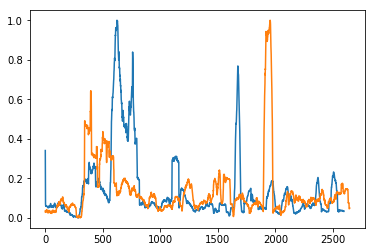

In [610]:
plt.plot(mmscaler.fit_transform(list_of_df_veff[0]['RBG1'].rolling(window=60).var().dropna().values.reshape(-1,1)))
plt.plot(mmscaler.fit_transform(list_of_df_amax[0]['RBG1'].rolling(window=60).var().dropna().values.reshape(-1,1)))

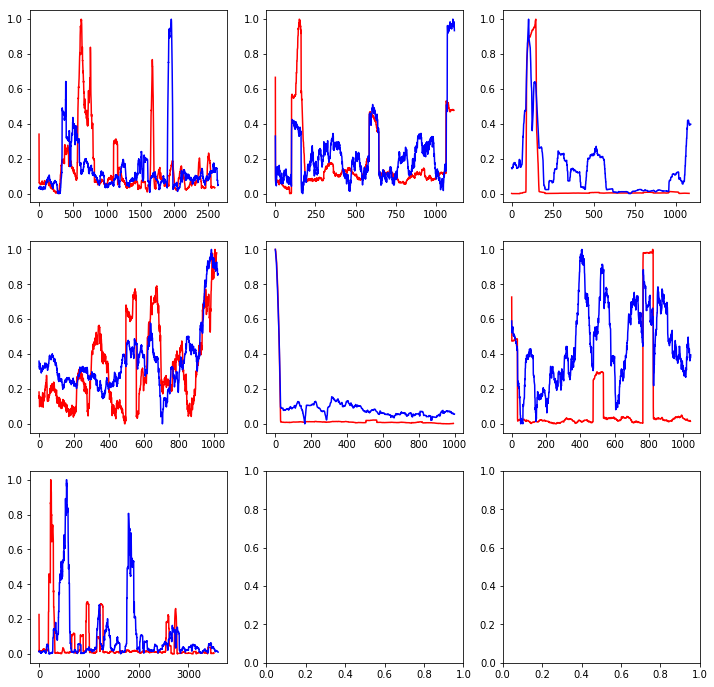

In [614]:
f,ax = plt.subplots(3,3, figsize=(12,12))
ax[0][0].plot( mmscaler.fit_transform(list_of_df_veff[0]['RBG1'].rolling(window=60).var().dropna().values.reshape(-1,1)),color='r')
ax[0][0].plot( mmscaler.fit_transform(list_of_df_amax[0]['RBG1'].rolling(window=60).var().dropna().values.reshape(-1,1)),color='b')

ax[0][1].plot( mmscaler.fit_transform(list_of_df_veff[1]['RBG2'].rolling(window=60).var().dropna().values.reshape(-1,1)),color='r')
ax[0][1].plot( mmscaler.fit_transform(list_of_df_amax[1]['RBG2'].rolling(window=60).var().dropna().values.reshape(-1,1)),color='b')

ax[0][2].plot( mmscaler.fit_transform(list_of_df_veff[2]['RBG3'].rolling(window=60).var().dropna().values.reshape(-1,1)),color='r' )
ax[0][2].plot( mmscaler.fit_transform(list_of_df_amax[2]['RBG3'].rolling(window=60).var().dropna().values.reshape(-1,1)) ,color='b')

ax[1][0].plot( mmscaler.fit_transform(list_of_df_veff[3]['RBG4'].rolling(window=60).var().dropna().values.reshape(-1,1)),color='r' )
ax[1][0].plot( mmscaler.fit_transform(list_of_df_amax[3]['RBG4'].rolling(window=60).var().dropna().values.reshape(-1,1)),color='b')


ax[1][1].plot( mmscaler.fit_transform(list_of_df_veff[4]['RBG5'].rolling(window=60).var().dropna().values.reshape(-1,1)),color='r' )
ax[1][1].plot( mmscaler.fit_transform(list_of_df_amax[4]['RBG5'].rolling(window=60).var().dropna().values.reshape(-1,1)),color='b' )

ax[1][2].plot( mmscaler.fit_transform(list_of_df_veff[5]['RBG6'].rolling(window=60).var().dropna().values.reshape(-1,1)) ,color='r')
ax[1][2].plot( mmscaler.fit_transform(list_of_df_amax[5]['RBG6'].rolling(window=60).var().dropna().values.reshape(-1,1)),color='b' )

ax[2][0].plot( mmscaler.fit_transform(list_of_df_veff[6]['RBG7'].rolling(window=60).var().dropna().values.reshape(-1,1)),color='r' )
ax[2][0].plot( mmscaler.fit_transform(list_of_df_amax[6]['RBG7'].rolling(window=60).var().dropna().values.reshape(-1,1)),color='b' )

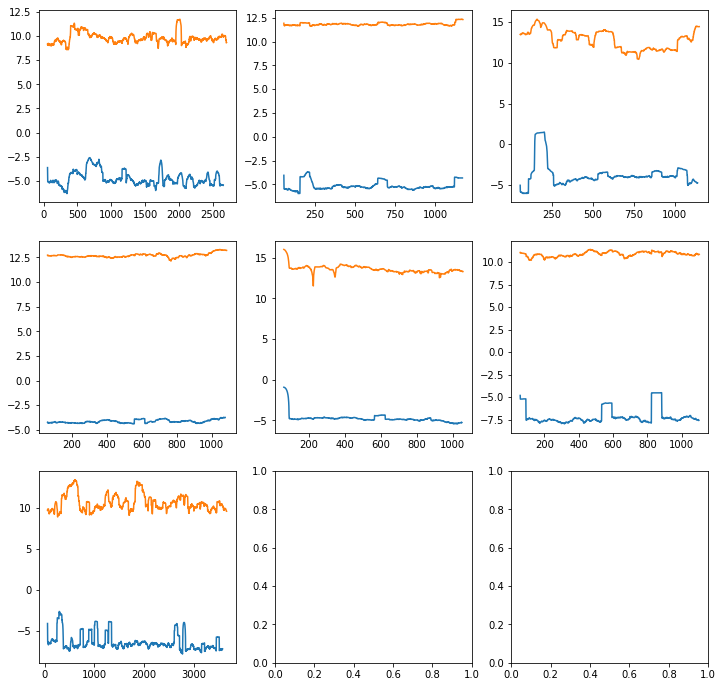

In [590]:
f,ax = plt.subplots(3,3, figsize=(12,12))
ax[0][0].plot( np.log(list_of_df_veff[0]['RBG1'].rolling(window=60).var()) )
ax[0][0].plot( np.log(list_of_df_amax[0]['RBG1'].rolling(window=60).var()) )

ax[0][1].plot( np.log(list_of_df_veff[1]['RBG2'].rolling(window=60).var()) )
ax[0][1].plot( np.log(list_of_df_amax[1]['RBG2'].rolling(window=60).var()) )

ax[0][2].plot( np.log(list_of_df_veff[2]['RBG3'].rolling(window=60).var()) )
ax[0][2].plot( np.log(list_of_df_amax[2]['RBG3'].rolling(window=60).var()) )

ax[1][0].plot( np.log(list_of_df_veff[3]['RBG4'].rolling(window=60).var()) )
ax[1][0].plot( np.log(list_of_df_amax[3]['RBG4'].rolling(window=60).var()) )


ax[1][1].plot( np.log(list_of_df_veff[4]['RBG5'].rolling(window=60).var()) )
ax[1][1].plot( np.log(list_of_df_amax[4]['RBG5'].rolling(window=60).var()) )

ax[1][2].plot( np.log(list_of_df_veff[5]['RBG6'].rolling(window=60).var()) )
ax[1][2].plot( np.log(list_of_df_amax[5]['RBG6'].rolling(window=60).var()) )

ax[2][0].plot( np.log(list_of_df_veff[6]['RBG7'].rolling(window=60).var()) )
ax[2][0].plot( np.log(list_of_df_amax[6]['RBG7'].rolling(window=60).var()) )

<h2> Drive Motor

In [551]:
list_of_df_veff = []
for i in ['1','2','3','4','5','6','7']:
    list_of_df_veff.append(pd.read_csv('Desktop/datathon_data_official/agg_1min_corrected/RBG%s_drive_motor_V_eff.csv' %i))
    
    
dfnames = ['RBG1','RBG2','RBG3','RBG4','RBG5','RBG6','RBG7']
for df,i in zip(list_of_df_veff, dfnames):
    df.columns = ['end_time',i]
    
for df in list_of_df_veff:
    df['end_time_d'] = df['end_time'].apply(string_to_date)

In [ ]:
f,ax = plt.subplots(2,1,figsize=(18,24))
drive_motor_rbg1_veff.set_index('end_time_d').plot(ax=ax[0])
drive_motor_rbg2_veff.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)
drive_motor_rbg3_veff.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)
drive_motor_rbg4_veff.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)
drive_motor_rbg5_veff.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)
drive_motor_rbg6_veff.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)
drive_motor_rbg7_veff.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)
ax[0].set_title('Driver motor - vibration')

drive_motor_rbg1_amax.set_index('end_time_d').plot(ax=ax[1])
drive_motor_rbg2_amax.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)
drive_motor_rbg3_amax.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)
drive_motor_rbg4_amax.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)
drive_motor_rbg5_amax.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)
drive_motor_rbg6_amax.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)
drive_motor_rbg7_amax.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)
ax[1].set_title('Driver motor - shock')

plt.savefig('drive_motor.png')

In [558]:
ind = 0
dat = list_of_df_veff[ind]
ind_2 = ind + 1
vals = dat['RBG%s' %ind_2]
thres = 0.05

dat = dat.set_index('end_time_d')
dat = generate_moving_var(dat['RBG%s' %ind_2])
dat['is_anomaly'] = dat['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
dat = dat.dropna(subset=['Moving_variance'])
dat.columns = ['realvalue','Moving_variance','is_anomaly']
dat.to_csv('Desktop/drive_motor/raw/raw_drivemotor_with_movvar_rbg%s_05.csv' % ind_2)

var_df = pd.DataFrame([l.flatten() for l in rolling_window(dat['Moving_variance'], window=10, step_size=1)])

var_df['label'] = var_df.apply( lambda x: max(x>thres), axis=1)
var_df['label'].sum()

var_df.to_csv('Desktop/drive_motor/moving_variance/drive_motor_movingvariance_rbg%s_05.csv' %ind_2 )

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.strides is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
def string_to_date(string):
    return dt.datetime.strptime(string, '%Y-%m-%d %H:%M:%S')

<h2> Drive Wheel

In [512]:
list_of_df_veff = []
for i in ['1','2','3','4','5','6','7']:
    list_of_df_veff.append(pd.read_csv('Desktop/datathon_data_official/agg_1min_corrected/RBG%s_drive_wheel_V_eff.csv' %i))
    
list_of_df_amax = []
for i in ['1','2','3','4','5','6','7']:
    list_of_df_amax.append(pd.read_csv('Desktop/datathon_data_official/agg_1min_corrected/RBG%s_drive_wheel_a_max.csv' %i))

In [513]:
dfnames = ['RBG1','RBG2','RBG3','RBG4','RBG5','RBG6','RBG7']
for df,i in zip(list_of_df_veff, dfnames):
    df.columns = ['end_time',i]
    
for df,i in zip(list_of_df_amax, dfnames):
    df.columns = ['end_time',i]

In [514]:
for df in list_of_df_veff:
    df['end_time_d'] = df['end_time'].apply(string_to_date)
    
for df in list_of_df_amax:
    df['end_time_d'] = df['end_time'].apply(string_to_date)

In [ ]:
f,ax = plt.subplots(2,1,figsize=(18,24))

for df in list_of_df_veff:
    df.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)

for df in list_of_df_amax:
    df.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)

ax[0].set_title('Driver wheel - vibration')
ax[1].set_title('Driver wheel - shock')

plt.savefig('drive_wheel.png')

Moving variance

Num of anomalies:  963


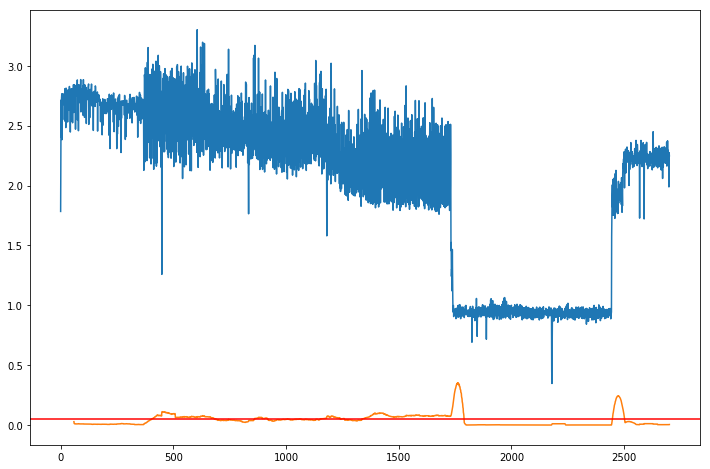

In [357]:
dat = list_of_df_veff[0]
vals = dat['RBG1']
thres = 0.05

dat = dat.set_index('end_time_d')
dat = generate_moving_var(dat['RBG1'])
dat['is_anomaly'] = dat['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
dat = dat.dropna(subset=['Moving_variance'])
print('Num of anomalies: ',len(dat[dat['is_anomaly'] == True]))

f,ax = plt.subplots(figsize=(12,8))
plt.plot(vals)
plt.plot(vals.rolling(window=60).var())
plt.axhline(thres, color='r')

In [521]:
ind = 0
dat = list_of_df_veff[ind]
ind_2 = ind + 1
vals = dat['RBG%s' %ind_2]
thres = 0.05

dat = dat.set_index('end_time_d')
dat = generate_moving_var(dat['RBG%s' %ind_2])
dat['is_anomaly'] = dat['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
dat = dat.dropna(subset=['Moving_variance'])
dat.columns = ['realvalue','Moving_variance','is_anomaly']
dat.to_csv('Desktop/drive_motor/raw/raw_drivewheel_with_movvar_rbg%s_05.csv' % ind_2)

var_df = pd.DataFrame([l.flatten() for l in rolling_window(dat['Moving_variance'], window=10, step_size=1)])

var_df['label'] = var_df.apply( lambda x: max(x>thres), axis=1)
var_df['label'].sum()

var_df.to_csv('Desktop/drive_motor/moving_variance/drive_wheel_movingvariance_rbg%s_05.csv' %ind_2 )

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.strides is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


<h2> Idle Wheel

In [522]:
list_of_df_veff = []
for i in ['1','2','3','4','5','6','7']:
    list_of_df_veff.append(pd.read_csv('Desktop/datathon_data_official/agg_1min_corrected/RBG%s_idle_wheel_V_eff.csv' %i))
    
list_of_df_amax = []
for i in ['1','2','3','4','5','6','7']:
    list_of_df_amax.append(pd.read_csv('Desktop/datathon_data_official/agg_1min_corrected/RBG%s_idle_wheel_a_max.csv' %i))

write to files

In [523]:
dfnames = ['RBG1','RBG2','RBG3','RBG4','RBG5','RBG6','RBG7']
for df,i in zip(list_of_df_veff, dfnames):
    df.columns = ['end_time',i]
    
for df,i in zip(list_of_df_amax, dfnames):
    df.columns = ['end_time',i]

In [524]:
for df in list_of_df_veff:
    df['end_time_d'] = df['end_time'].apply(string_to_date)
    
for df in list_of_df_amax:
    df['end_time_d'] = df['end_time'].apply(string_to_date)

Text(0.5,1,'Idle wheel - shock')

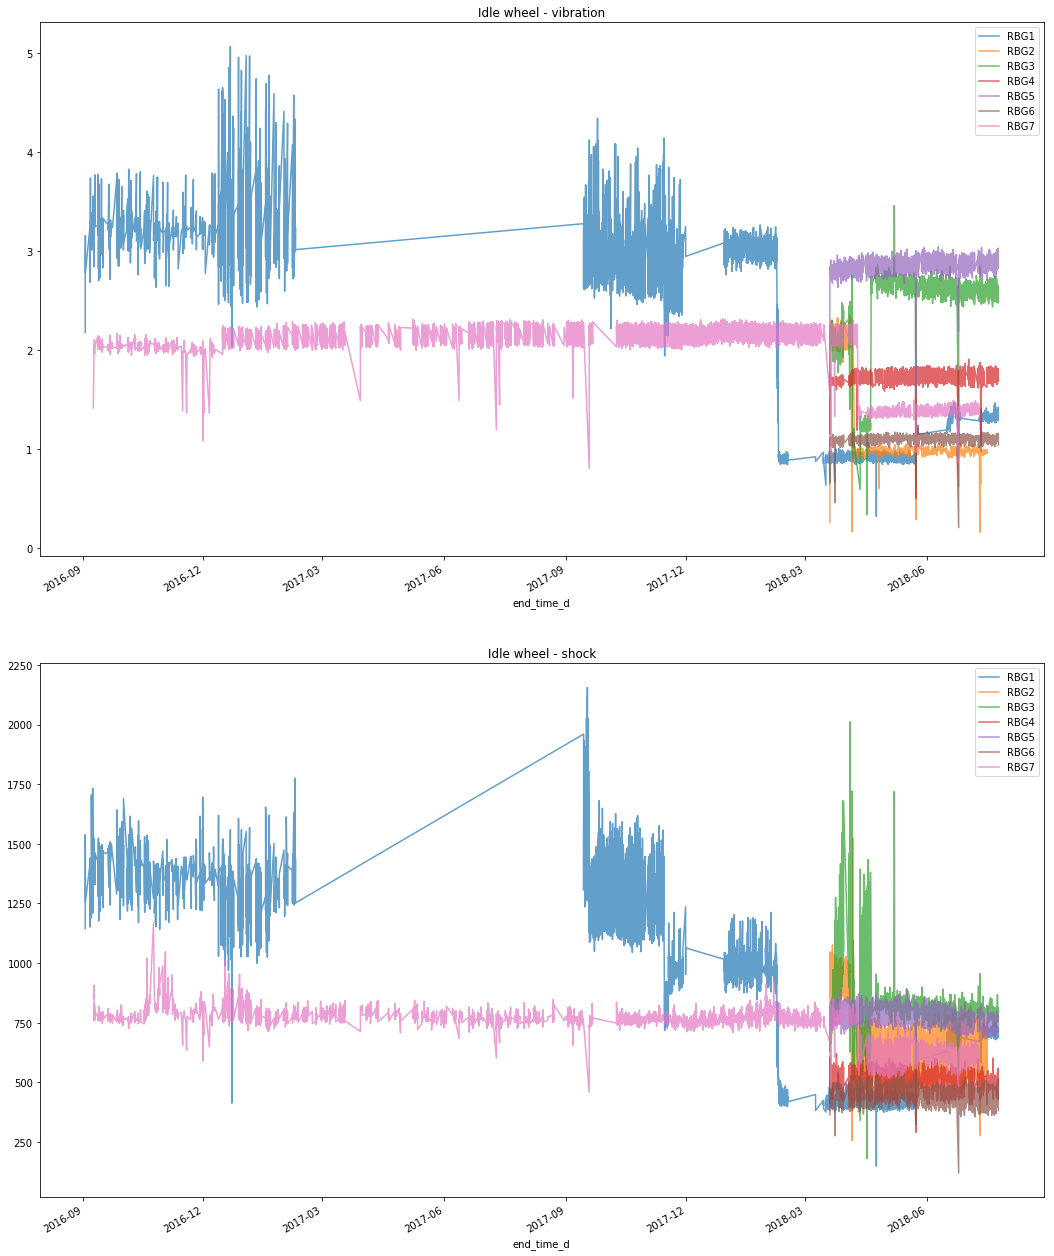

In [17]:
f,ax = plt.subplots(2,1,figsize=(18,24))

for df in list_of_df_veff:
    df.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)

for df in list_of_df_amax:
    df.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)

ax[0].set_title('Idle wheel - vibration')
ax[1].set_title('Idle wheel - shock')

# plt.savefig('idle_wheel.png')

In [ ]:
list_of_df_veff_subsets = []
for df in list_of_df_veff:
    list_of_df_veff_subsets.append( df[df['end_time_d'].between(dt.datetime(2018,3,19),dt.datetime(2018,7,24))] )

<h3> Flagging anomalies using Moving Variance (Idle Wheel Vibration)

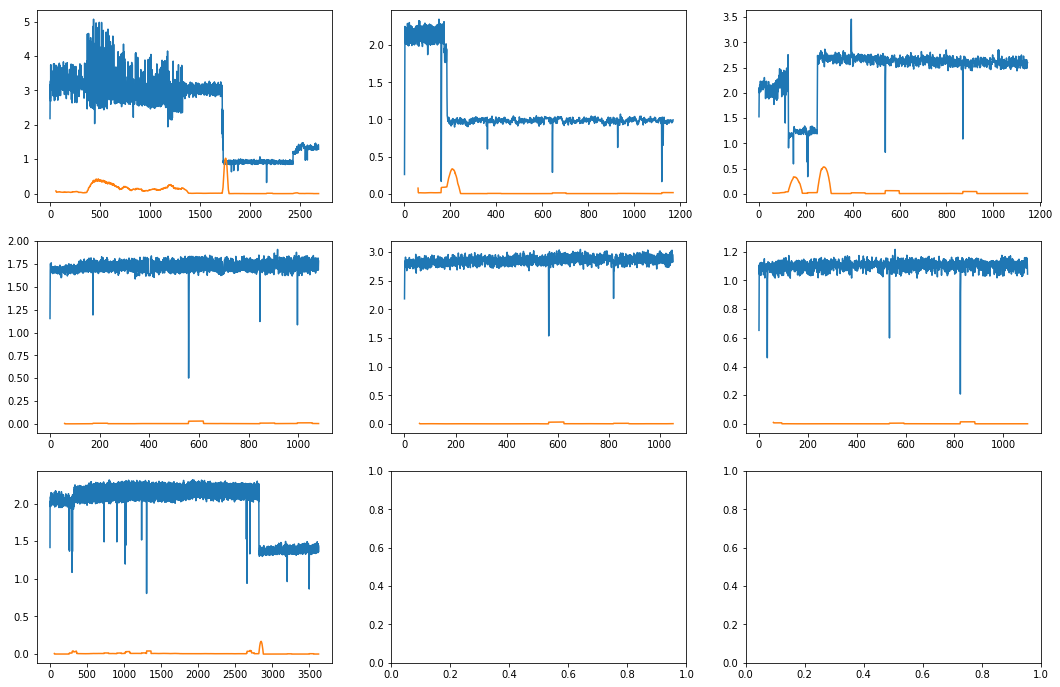

In [131]:
f,ax = plt.subplots(3,3,figsize=(18,12))
ax[0][0].plot(list_of_df_veff[0]['RBG1'])
ax[0][0].plot(list_of_df_veff[0]['RBG1'].rolling(window=60).var())

ax[0][1].plot(list_of_df_veff[1]['RBG2'])
ax[0][1].plot(list_of_df_veff[1]['RBG2'].rolling(window=60).var())

ax[0][2].plot(list_of_df_veff[2]['RBG3'])
ax[0][2].plot(list_of_df_veff[2]['RBG3'].rolling(window=60).var())

ax[1][0].plot(list_of_df_veff[3]['RBG4'])
ax[1][0].plot(list_of_df_veff[3]['RBG4'].rolling(window=60).var())

ax[1][1].plot(list_of_df_veff[4]['RBG5'])
ax[1][1].plot(list_of_df_veff[4]['RBG5'].rolling(window=60).var())

ax[1][2].plot(list_of_df_veff[5]['RBG6'])
ax[1][2].plot(list_of_df_veff[5]['RBG6'].rolling(window=60).var())

ax[2][0].plot(list_of_df_veff[6]['RBG7'])
ax[2][0].plot(list_of_df_veff[6]['RBG7'].rolling(window=60).var())

In [146]:
def generate_moving_var(series):
    moving_var_s = series.rolling(window=60).var()
    out = pd.DataFrame([series, moving_var_s]).T
    out.columns = [out.columns[0], 'Moving_variance']
    return out

In [138]:
def is_anomaly(moving_var, threshold):
    if moving_var >= threshold:
        return True
    else:
        return False    

In [531]:
ind = 6
dat = list_of_df_veff[ind]
ind_2 = ind + 1
vals = dat['RBG%s' %ind_2]
thres = 0.05

dat = dat.set_index('end_time_d')
dat = generate_moving_var(dat['RBG%s' %ind_2])
dat['is_anomaly'] = dat['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
dat = dat.dropna(subset=['Moving_variance'])
dat.columns = ['realvalue','Moving_variance','is_anomaly']
dat.to_csv('raw_dat_with_movvar_rbg%s_05.csv' % ind_2)

var_df = pd.DataFrame([l.flatten() for l in rolling_window(dat['Moving_variance'], window=10, step_size=1)])

var_df['label'] = var_df.apply( lambda x: max(x>thres), axis=1)
var_df['label'].sum()

var_df.to_csv('idle_wheel_movingvariance_rbg%s_05.csv' %ind_2 )

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.strides is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [218]:
def rolling_window(a, window, step_size):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1 - step_size, window)
    strides = a.strides + (a.strides[-1] * step_size,)
    output = np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)
    return output.reshape(output.shape[0], output.shape[1], 1)

Num of anomalies:  954


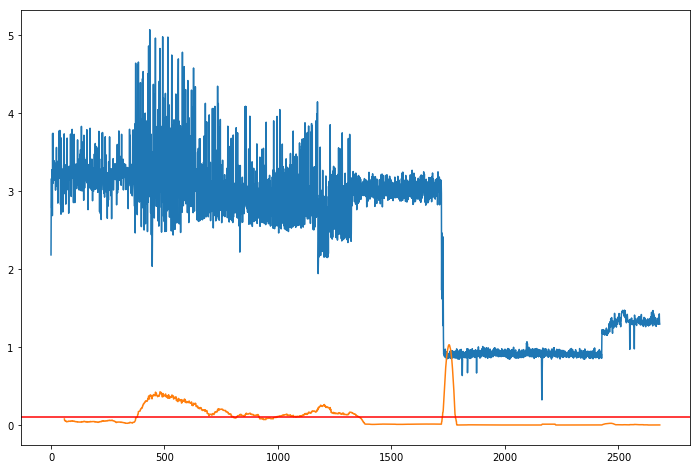

In [352]:
dat = list_of_df_veff[0]
vals = dat['RBG1']
thres = 0.1

dat = dat.set_index('end_time_d')
dat = generate_moving_var(dat['RBG1'])
dat['is_anomaly'] = dat['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
dat = dat.dropna(subset=['Moving_variance'])
print('Num of anomalies: ',len(dat[dat['is_anomaly'] == True]))

f,ax = plt.subplots(figsize=(12,8))
plt.plot(vals)
plt.plot(vals.rolling(window=60).var())
plt.axhline(thres, color='r')

Num of anomalies:  37


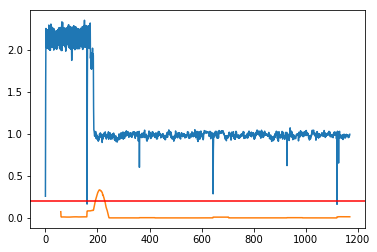

In [189]:
dat = list_of_df_veff[1]
vals = dat['RBG2']
thres = 0.2

dat['is_anomaly'] = generate_moving_var(vals)['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
print('Num of anomalies: ',len(dat[dat['is_anomaly'] == True]))

plt.plot(vals)
plt.plot(vals.rolling(window=60).var())
plt.axhline(thres, color='r')

Num of anomalies:  88


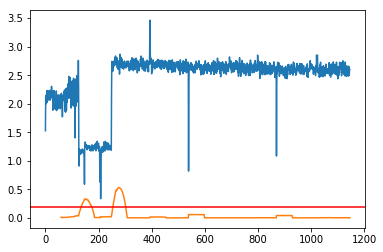

In [190]:
dat = list_of_df_veff[2]
vals = dat['RBG3']
thres = 0.2

dat['is_anomaly'] = generate_moving_var(vals)['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
print('Num of anomalies: ',len(dat[dat['is_anomaly'] == True]))

plt.plot(vals)
plt.plot(vals.rolling(window=60).var())
plt.axhline(thres, color='r')

Num of anomalies:  0


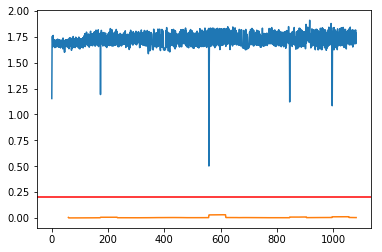

In [191]:
dat = list_of_df_veff[3]
vals = dat['RBG4']
thres = 0.2

dat['is_anomaly'] = generate_moving_var(vals)['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
print('Num of anomalies: ',len(dat[dat['is_anomaly'] == True]))

plt.plot(vals)
plt.plot(vals.rolling(window=60).var())
plt.axhline(thres, color='r')

Num of anomalies:  0


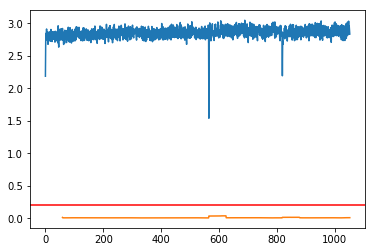

In [192]:
dat = list_of_df_veff[4]
vals = dat['RBG5']
thres = 0.2

dat['is_anomaly'] = generate_moving_var(vals)['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
print('Num of anomalies: ',len(dat[dat['is_anomaly'] == True]))

plt.plot(vals)
plt.plot(vals.rolling(window=60).var())
plt.axhline(thres, color='r')

Num of anomalies:  0


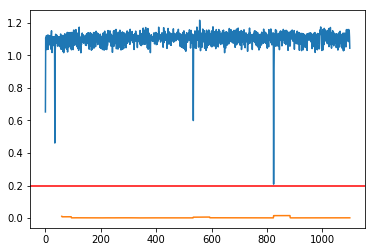

In [194]:
dat = list_of_df_veff[5]
vals = dat['RBG6']
thres = 0.2

dat['is_anomaly'] = generate_moving_var(vals)['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
print('Num of anomalies: ',len(dat[dat['is_anomaly'] == True]))

plt.plot(vals)
plt.plot(vals.rolling(window=60).var())
plt.axhline(thres, color='r')

Num of anomalies:  0


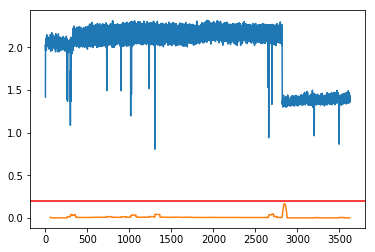

In [270]:
dat = list_of_df_veff[6]
vals = dat['RBG7']
thres = 0.2

dat['is_anomaly'] = generate_moving_var(vals)['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
print('Num of anomalies: ',len(dat[dat['is_anomaly'] == True]))

plt.plot(vals)
plt.plot(vals.rolling(window=60).var())
plt.axhline(thres, color='r')

___

Write 2 files: 1 with outlier, 1 without

In [ ]:
for subset in list_of_df_veff_subsets:
    filename = subset.columns[1]
    print(filename)
    subset.to_csv('/Users/kenghooi/Desktop/idle_wheel/%s.csv' % filename)

In [ ]:
list_of_df_wo_outliers = []
for subset in list_of_df_veff_subsets:
    nam = subset.columns[1]
    upper_outlier = subset.quantile(.99).values[0]
    lower_outlier = subset.quantile(.01).values[0]
    
    outlier_filter = (subset[nam] <= lower_outlier) |  (subset[nam] >= upper_outlier)
    list_of_df_wo_outliers.append(subset[~outlier_filter])

___

In [ ]:
scaler = StandardScaler()

list_of_df_veff_subsets_scaled = list_of_df_veff_subsets.copy()

In [ ]:
f,ax = plt.subplots(figsize=(18,12))

for subset, dfname in zip(list_of_df_veff_subsets_scaled,dfnames):
    subset[dfname] = scaler.fit_transform(subset[dfname].values.reshape(-1,1))
    subset.set_index('end_time_d').plot(ax=ax, alpha=0.7)

In [ ]:
f,ax = plt.subplots(figsize=(12,5))
list_of_df_veff_subsets_scaled[2]['RBG3'].plot(ax=ax)
mean_ = list_of_df_veff_subsets_scaled[2]['RBG3'].mean()

rolling_means_ = list_of_df_veff_subsets_scaled[2]['RBG3'].rolling(window=10).mean()

# rolling_stds_ = list_of_df_veff_subsets_scaled[2]['RBG3'].rolling(window=10).std()

std_2 = list_of_df_veff_subsets_scaled[2]['RBG3'].std()

sample_n = len(rolling_means_.dropna())

# upper = rolling_means_ + 1.96*( std_2/ (sample_n**.5))
# lower = rolling_means_ - 1.96*( std_2/ (sample_n**.5))

rolling_means_.plot(ax=ax)
upper.plot(ax=ax)
lower.plot(ax=ax)

<h2> Lifting Gear

In [626]:
list_of_df_veff = []
for i in ['1','2','3','4','5','6','7']:
    list_of_df_veff.append(pd.read_csv('Desktop/datathon_data_official/agg_1min_corrected/RBG%s_lifting_gear_V_eff.csv' %i))
    
list_of_df_amax = []
for i in ['1','2','3','4','5','6','7']:
    list_of_df_amax.append(pd.read_csv('Desktop/datathon_data_official/agg_1min_corrected/RBG%s_lifting_gear_a_max.csv' %i))

In [627]:
dfnames = ['RBG1','RBG2','RBG3','RBG4','RBG5','RBG6','RBG7']
for df,i in zip(list_of_df_veff, dfnames):
    df.columns = ['end_time',i]
    
for df,i in zip(list_of_df_amax, dfnames):
    df.columns = ['end_time',i]

In [628]:
for df in list_of_df_veff:
    df['end_time_d'] = df['end_time'].apply(string_to_date)
    
for df in list_of_df_amax:
    df['end_time_d'] = df['end_time'].apply(string_to_date)

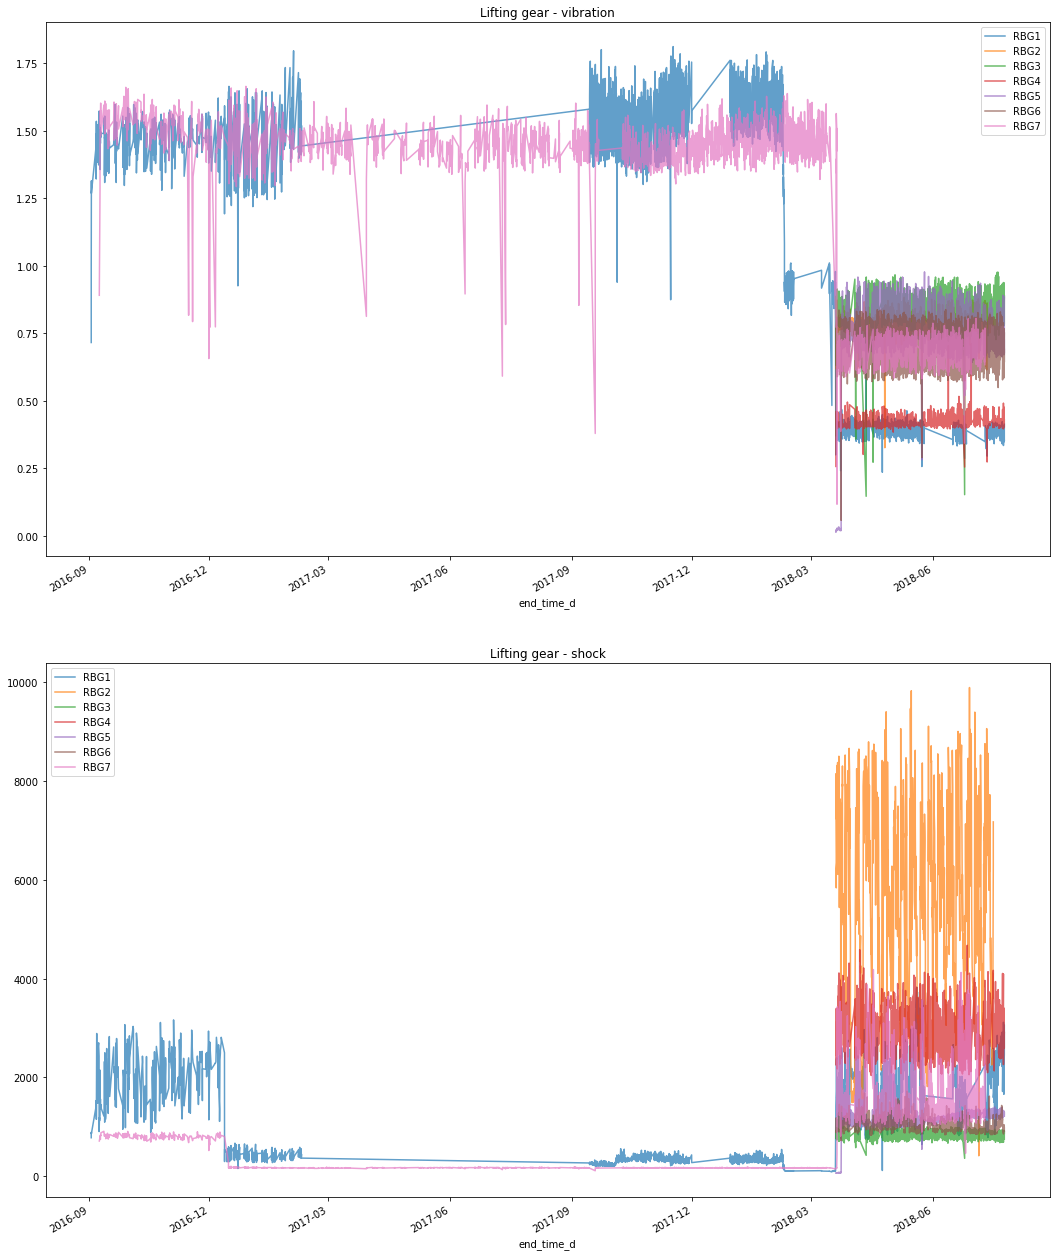

In [629]:
f,ax = plt.subplots(2,1,figsize=(18,24))

for df in list_of_df_veff:
    df.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)

for df in list_of_df_amax:
    df.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)

ax[0].set_title('Lifting gear - vibration')
ax[1].set_title('Lifting gear - shock')

plt.savefig('lifting_gear.png')

In [ ]:
list_of_df_veff_subsets = []
for df in list_of_df_veff:
#     df.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)
    list_of_df_veff_subsets.append( df[df['end_time_d'].between(dt.datetime(2018,3,19),dt.datetime(2018,7,24))] )

In [ ]:
f,ax = plt.subplots(figsize=(18,12))

for subset, dfname in zip(list_of_df_veff_subsets_scaled,dfnames):
    subset[dfname] = scaler.fit_transform(subset[dfname].values.reshape(-1,1))
    subset.set_index('end_time_d').plot(ax=ax, alpha=0.7)
    

In [541]:
ind = 6
dat = list_of_df_veff[ind]
ind_2 = ind + 1
vals = dat['RBG%s' %ind_2]
thres = 0.05

dat = dat.set_index('end_time_d')
dat = generate_moving_var(dat['RBG%s' %ind_2])
dat['is_anomaly'] = dat['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
dat = dat.dropna(subset=['Moving_variance'])
dat.columns = ['realvalue','Moving_variance','is_anomaly']
dat.to_csv('Desktop/lifting_gear/raw/raw_liftinggear_with_movvar_rbg%s_05.csv' % ind_2)

var_df = pd.DataFrame([l.flatten() for l in rolling_window(dat['Moving_variance'], window=10, step_size=1)])

var_df['label'] = var_df.apply( lambda x: max(x>thres), axis=1)
var_df['label'].sum()

var_df.to_csv('Desktop/lifting_gear/moving_variance/lifting_gear_movingvariance_rbg%s_05.csv' %ind_2 )

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.strides is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


<h2> Lifting Motor

In [542]:
list_of_df_veff = []
for i in ['1','2','3','4','5','6','7']:
    list_of_df_veff.append(pd.read_csv('Desktop/datathon_data_official/agg_1min_corrected/RBG%s_lifting_motor_V_eff.csv' %i))
    
list_of_df_amax = []
for i in ['1','2','3','4','5','6','7']:
    list_of_df_amax.append(pd.read_csv('Desktop/datathon_data_official/agg_1min_corrected/RBG%s_lifting_motor_a_max.csv' %i))

In [543]:
dfnames = ['RBG1','RBG2','RBG3','RBG4','RBG5','RBG6','RBG7']
for df,i in zip(list_of_df_veff, dfnames):
    df.columns = ['end_time',i]
    
for df,i in zip(list_of_df_amax, dfnames):
    df.columns = ['end_time',i]

In [544]:
for df in list_of_df_veff:
    df['end_time_d'] = df['end_time'].apply(string_to_date)
    
for df in list_of_df_amax:
    df['end_time_d'] = df['end_time'].apply(string_to_date)

In [ ]:
f,ax = plt.subplots(2,1,figsize=(18,24))

for df in list_of_df_veff:
    df.set_index('end_time_d').plot(ax=ax[0], alpha=0.7)

for df in list_of_df_amax:
    df.set_index('end_time_d').plot(ax=ax[1], alpha=0.7)

ax[0].set_title('Idle motor - vibration')
ax[1].set_title('Idle motor - shock')

plt.savefig('lifting_motor.png')

In [550]:
ind = 6
dat = list_of_df_veff[ind]
ind_2 = ind + 1
vals = dat['RBG%s' %ind_2]
thres = 0.05

dat = dat.set_index('end_time_d')
dat = generate_moving_var(dat['RBG%s' %ind_2])
dat['is_anomaly'] = dat['Moving_variance'].apply(lambda x: is_anomaly(x,thres))
dat = dat.dropna(subset=['Moving_variance'])
dat.columns = ['realvalue','Moving_variance','is_anomaly']
dat.to_csv('Desktop/lifting_motor/raw/raw_liftingmotor_with_movvar_rbg%s_05.csv' % ind_2)

var_df = pd.DataFrame([l.flatten() for l in rolling_window(dat['Moving_variance'], window=10, step_size=1)])

var_df['label'] = var_df.apply( lambda x: max(x>thres), axis=1)
var_df['label'].sum()

var_df.to_csv('Desktop/lifting_motor/moving_variance/lifting_motor_movingvariance_rbg%s_05.csv' %ind_2 )

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.strides is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


_____

In [619]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
minmaxScaler = MinMaxScaler()

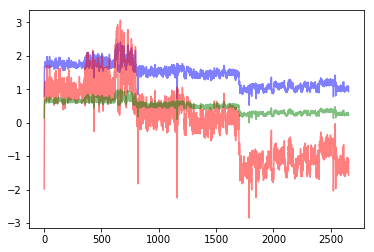

In [620]:
to_scale = list_of_df_veff[0]['RBG1']
y_scaled = scaler.fit_transform( to_scale.values.reshape(-1,1))
y_minmaxScaled = minmaxScaler.fit_transform( to_scale.values.reshape(-1,1))

plt.plot(to_scale, color='b', alpha=.5)
plt.plot(y_scaled, color='r', alpha=.5)
plt.plot(y_minmaxScaled, color='g', alpha=.5)

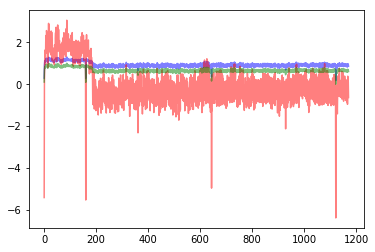

In [621]:
to_scale = list_of_df_veff[1]['RBG2']
y_scaled = scaler.fit_transform( to_scale.values.reshape(-1,1))
y_minmaxScaled = minmaxScaler.fit_transform( to_scale.values.reshape(-1,1))

plt.plot(to_scale, color='b', alpha=.5)
plt.plot(y_scaled, color='r', alpha=.5)
plt.plot(y_minmaxScaled, color='g', alpha=.5)

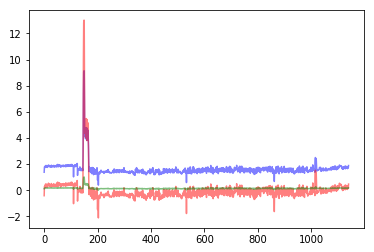

In [622]:
to_scale = list_of_df_veff[2]['RBG3']
y_scaled = scaler.fit_transform( to_scale.values.reshape(-1,1))
y_minmaxScaled = minmaxScaler.fit_transform( to_scale.values.reshape(-1,1))

plt.plot(to_scale, color='b', alpha=.5)
plt.plot(y_scaled, color='r', alpha=.5)
plt.plot(y_minmaxScaled, color='g', alpha=.5)

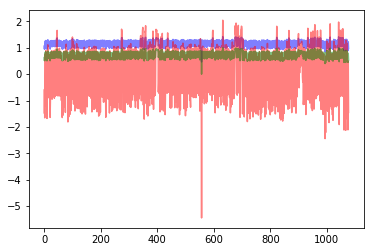

In [623]:
to_scale = list_of_df_veff[3]['RBG4']
y_scaled = scaler.fit_transform( to_scale.values.reshape(-1,1))
y_minmaxScaled = minmaxScaler.fit_transform( to_scale.values.reshape(-1,1))

plt.plot(to_scale, color='b', alpha=.5)
plt.plot(y_scaled, color='r', alpha=.5)
plt.plot(y_minmaxScaled, color='g', alpha=.5)

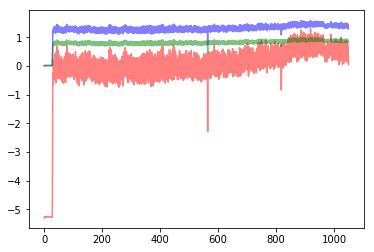

In [624]:
to_scale = list_of_df_veff[4]['RBG5']
y_scaled = scaler.fit_transform( to_scale.values.reshape(-1,1))
y_minmaxScaled = minmaxScaler.fit_transform( to_scale.values.reshape(-1,1))

plt.plot(to_scale, color='b', alpha=.5)
plt.plot(y_scaled, color='r', alpha=.5)
plt.plot(y_minmaxScaled, color='g', alpha=.5)

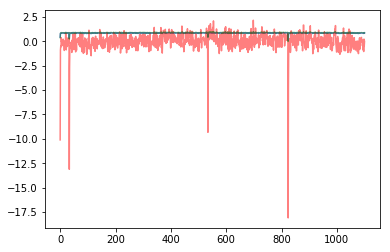

In [625]:
to_scale = list_of_df_veff[5]['RBG6']
y_scaled = scaler.fit_transform( to_scale.values.reshape(-1,1))
y_minmaxScaled = minmaxScaler.fit_transform( to_scale.values.reshape(-1,1))

plt.plot(to_scale, color='b', alpha=.5)
plt.plot(y_scaled, color='r', alpha=.5)
plt.plot(y_minmaxScaled, color='g', alpha=.5)